In [2]:
!pip install protobuf==3.20.*

     ------------------------------------- 904.2/904.2 kB 28.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:
      Successfully uninstalled protobuf-3.19.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [8]:
!pip install tesseract

In [17]:
from mss import mss
import pydirectinput
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import time
from gym import Env
from gym.spaces import Box,Discrete
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [53]:
class WebGame(Env):
    # Setup env action and obs shapes
    def __init__(self):
        super().__init__()
        self.observation_space = Box(low = 0, high = 255, shape= (1,83,100), dtype = np.uint8)
        self.action_space = Discrete(3)
        # Extraction parameters
        self.cap = mss()
        self.game_location = {'top':100, 'left':0,'width':600, 'height':500}
        self.done_location = {'top':270, 'left':300,'width':360, 'height':70}
        
        
    # Do something
    def step(self,action):
        pass
    # Visualize
    def render(self):
        pass
    def reset(self):
        pass
    def close(self):
        pass
    # Get part of obs of the game we are looking for
    def get_observation(self):
        #Screen capture
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3]
        gray = cv2.cvtColor(raw,cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100,83))
        channel = np.reshape(resized, (1,83,100))
        return channel
    # Check if game is over
    def get_done(self):
        
        done_cap = np.array(self.cap.grab(self.done_location),dtype = np.uint8)[:,:,:3]
        done_strings = ['GAME', 'GAHE','SAME']
        done = False
        # OCR to detect GAME OVER text
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
            
        return done,done_cap 

In [54]:
env = WebGame()

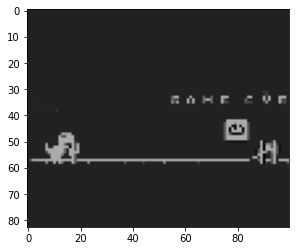

In [55]:
plt.imshow(cv2.cvtColor(env.get_observation()[0], cv2.COLOR_BGR2RGB))

In [56]:
done, done_cap = env.get_done()

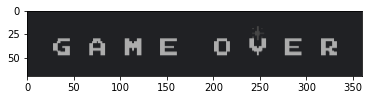

In [57]:
plt.imshow(cv2.cvtColor(done_cap, cv2.COLOR_BGR2RGB))

In [58]:
done

True

In [48]:
env.action_space.sample()

0

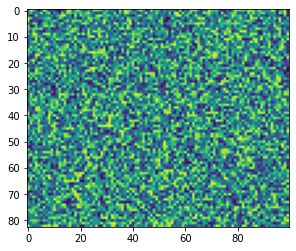

In [17]:
plt.imshow(env.observation_space.sample()[0])